# Hello $g_m/I_D$  
* Based on the Cian O'Donnell scripts
* By Mauricio Montanares

# Starting PyGMID

Load the data 

In [1]:
from pygmid import Lookup as lk

NCH = lk('130n1vrvt.pkl')
PCH = lk('130p1vrvt.pkl')

print("Successfully loaded transistor data")

Successfully loaded transistor data


----------- Plot ID versus VDS -----------


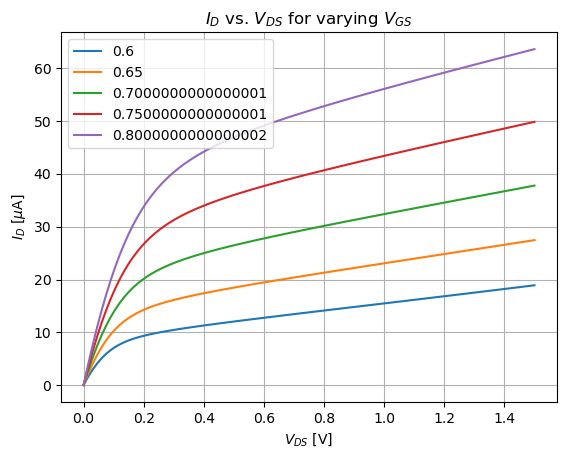

----------- Plot Vt against L -----------


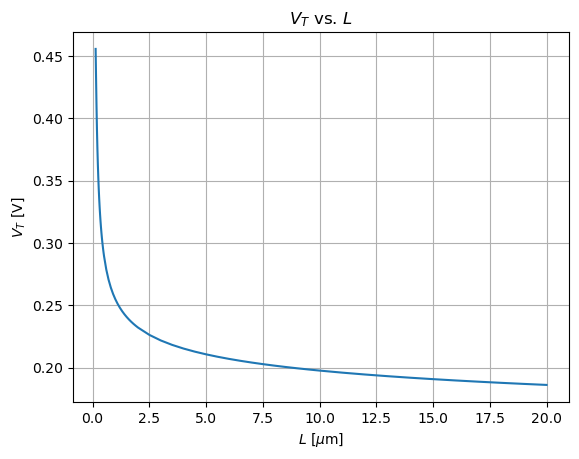

----------- Plot ft against gm_id for different L -----------


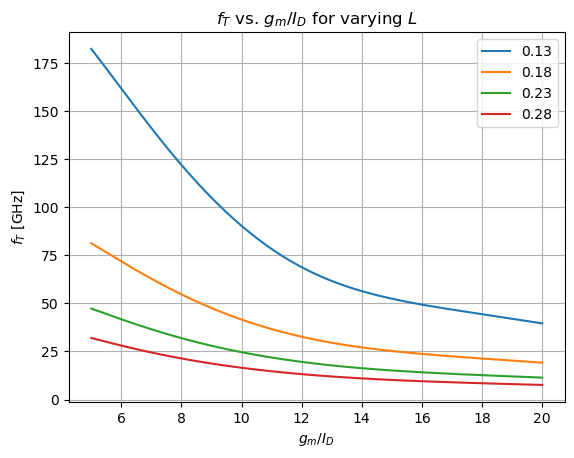

----------- Plot id/w against gm_id for different L -----------


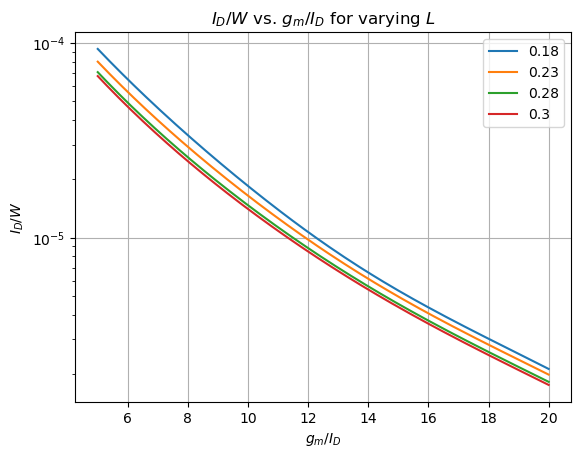

----------- Plot id/w against gm_id for different VDS (at minimum L) -----------


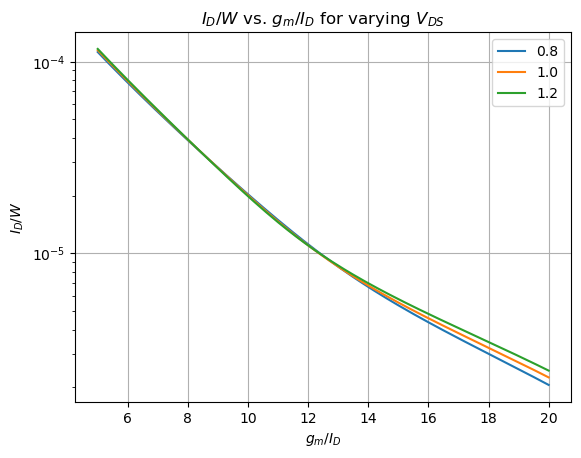

In [28]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from time import time


VDSs = NCH['VDS']       # lookup object has pseudo-array access to data
VGSs = np.arange(0.6, 0.8, 0.05)

# Plot ID versus VDS
print("----------- Plot ID versus VDS -----------")
ID = PCH.look_up('ID', vds=VDSs, vgs=VGSs)
plt.figure()
plt.plot(VDSs, 1e6*ID.T)
plt.ylabel(r"$I_D$ [$\mu$A]")
plt.xlabel(r"$V_{DS}$ [V]")
plt.title(r'$I_D$ vs. $V_{DS}$ for varying $V_{GS}$')
plt.legend(VGSs)
plt.grid()
plt.show()

# plot Vt against L
print("----------- Plot Vt against L -----------")
Ls = NCH['L']
vt = NCH.look_up('VT', vgs=0.6, L=Ls)
plt.figure()
plt.plot(Ls, vt.T)
plt.ylabel(r"$V_T$ [V]")
plt.xlabel(r"$L$ [$\mu$m]")
plt.title(r'$V_T$ vs. $L$')
plt.grid()
plt.show()

# Plot ft against gm_id for different L
print("----------- Plot ft against gm_id for different L -----------")
step = 0.1
gm_ids = np.arange(5, 20+step, step)
Ls = np.arange(min(NCH['L']),0.3,0.05)
s = time()
ft = NCH.look_up('GM_CGG', GM_ID=gm_ids, L =np.arange(min(Ls),0.3,0.05))/2/np.pi
#e = time()
#print(f"Time taken: {(e-s)*1000} [ms]")
plt.figure()
plt.plot(gm_ids, 1e-9*ft.T)
plt.ylabel(r"$f_T$ [GHz]")
plt.xlabel(r"$g_m/I_D$")
plt.title(r'$f_T$ vs. $g_m/I_D$ for varying $L$')
plt.legend(np.around(Ls, decimals=2))
plt.grid()
plt.show()

# Plot id/w against gm_id for different L
print("----------- Plot id/w against gm_id for different L -----------")
gm_ids = np.arange(5, 20+0.1, 0.1)
step = 0.05
Ls = [0.18, 0.23, 0.28, 0.3]
id_w = NCH.look_up('ID_W', GM_ID=gm_ids, L=Ls)
plt.figure()
plt.semilogy(gm_ids, id_w.T)
plt.ylabel(r"$I_D/W$")
plt.xlabel(r"$g_m/I_D$")
plt.title(r'$I_D/W$ vs. $g_m/I_D$ for varying $L$')
plt.legend(np.around(Ls, decimals=2))
plt.grid()
plt.show()

# Plot id/w against gm_id for different VDS (at minimum L)
print("----------- Plot id/w against gm_id for different VDS (at minimum L) -----------")
gm_ids = np.arange(5, 20+0.1, 0.1)
id_w = NCH.look_up('ID_W', GM_ID=gm_ids, VDS=[0.8, 1.0, 1.2])
plt.figure()
plt.semilogy(gm_ids, id_w.T)
plt.ylabel(r"$I_D/W$")
plt.xlabel(r"$g_m/I_D$")
plt.title(r'$I_D/W$ vs. $g_m/I_D$ for varying $V_{DS}$')
plt.legend([0.8, 1.0, 1.2])
plt.grid()
plt.show()


----------- Plot gm/gds against gm_id (for different L's and default VDS) (NCH) -----------



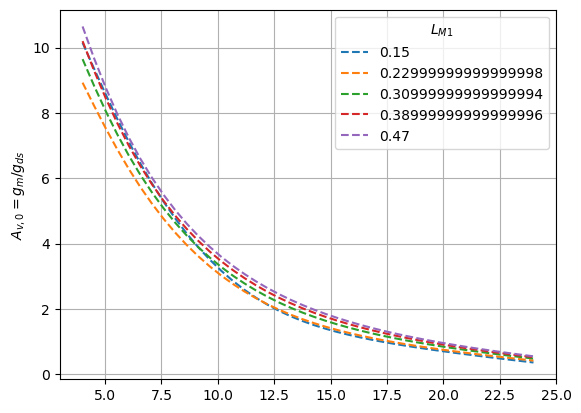

----------- Plot gm/gds against gm_id (for different L's and default VDS) (PCH) -----------



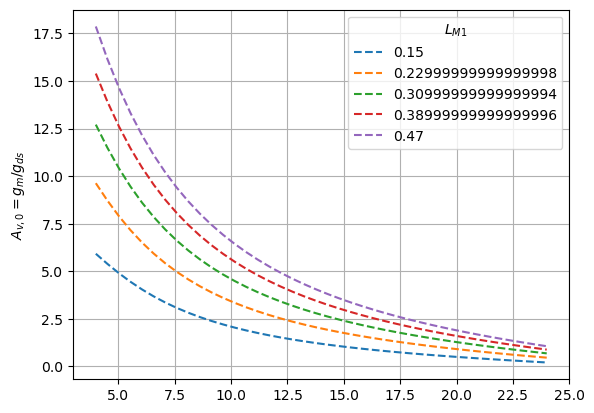

In [24]:
# Plot gm/gds against gm_id (for different L's and default VDS)
print("----------- Plot gm/gds against gm_id (for different L's and default VDS) (NCH) -----------")
print("")

Ls = np.arange(0.15, 0.5, 0.08)
GM_IDs = np.linspace(4, 24, num=40)

#calculate AV's
Av = NCH.look_up('GM_GDS', GM_ID=GM_IDs, L=Ls)
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()


labels = [str(i) for i in Ls]
ax1.plot(GM_IDs, Av.T,linestyle='dashed')
ax1.set_ylabel(r"$A_{v,0}=g_m/g_{ds}$")
ax1.grid()
ax1.legend(labels,title=r"$L_{M1}$")
plt.show()


# Plot gm/gds against gm_id (for different L's and default VDS)
print("----------- Plot gm/gds against gm_id (for different L's and default VDS) (PCH) -----------")
print("")

Ls = np.arange(0.15, 0.5, 0.08)
GM_IDs = np.linspace(4, 24, num=40)

#calculate AV's
Av = PCH.look_up('GM_GDS', GM_ID=GM_IDs, L=Ls)
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()


labels = [str(i) for i in Ls]
ax1.plot(GM_IDs, Av.T,linestyle='dashed')
ax1.set_ylabel(r"$A_{v,0}=g_m/g_{ds}$")
ax1.grid()
ax1.legend(labels,title=r"$L_{M1}$")
plt.show()